# 🌍 BÀI 4: PHÂN CỤM CÁC QUỐC GIA THEO MỨC ĐỘ RỦI RO THẢM HỌA

**Mục tiêu:** Phân cụm quốc gia dựa trên tần suất thiên tai, mức độ thiệt hại và khả năng ứng phó.

**4 nhóm rủi ro:**
| Nhóm | Đặc điểm | Ví dụ |
|:--|:--|:--|
| 🔴 Cao | Thiên tai thường xuyên, thiệt hại lớn | Bangladesh, Philippines |
| 🟠 TB | Thiên tai khá thường xuyên | Việt Nam, Indonesia |
| 🟡 Thấp-TH cao | Ít xảy ra nhưng thiệt hại lớn | Nhật Bản, Mỹ |
| 🟢 Thấp | Hiếm khi xảy ra | Na Uy, Thụy Sĩ |

**Thuật toán:** K-Means, Hierarchical, DBSCAN

## 📦 PHẦN 1: IMPORT THƯ VIỆN
- `pandas`, `numpy`: Xử lý dữ liệu
- `sklearn.cluster`: K-Means, Hierarchical, DBSCAN
- `sklearn.metrics`: Đánh giá clustering
- `matplotlib`, `seaborn`: Trực quan hóa

In [1]:
# ============================================================
# 📦 IMPORT THƯ VIỆN CẦN THIẾT
# ============================================================

# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Thư viện phân cụm (Clustering)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Thư viện tiền xử lý
from sklearn.preprocessing import StandardScaler

# Thư viện đánh giá clustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Cài đặt hiển thị
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("✅ Import thư viện thành công!")
print("=" * 50)
print("📚 Các thuật toán Clustering sẽ sử dụng:")
print("   1. K-Means Clustering")
print("   2. Hierarchical (Agglomerative) Clustering")
print("   3. DBSCAN (Density-Based Clustering)")
print("=" * 50)

✅ Import thư viện thành công!
📚 Các thuật toán Clustering sẽ sử dụng:
   1. K-Means Clustering
   2. Hierarchical (Agglomerative) Clustering
   3. DBSCAN (Density-Based Clustering)


## 📂 PHẦN 2: ĐỌC VÀ KHÁM PHÁ DỮ LIỆU
Load dữ liệu từ CSV, kiểm tra thông tin cơ bản về dataset.

In [2]:
# ============================================================
# 📂 ĐỌC DỮ LIỆU TỪ FILE CSV
# ============================================================

# Đường dẫn file dữ liệu (file nằm cùng thư mục với notebook)
file_path = 'global_disaster_response_2018_2024.csv'

# Đọc dữ liệu
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
print("=" * 60)
print("📊 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU")
print("=" * 60)
print(f"\n📌 Số dòng: {df.shape[0]:,}")
print(f"📌 Số cột: {df.shape[1]}")
print(f"\n📌 Các cột trong dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n" + "=" * 60)
print("📋 5 DÒNG ĐẦU TIÊN CỦA DỮ LIỆU")
print("=" * 60)
df.head()

📊 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU

📌 Số dòng: 50,000
📌 Số cột: 12

📌 Các cột trong dataset:
   1. date
   2. country
   3. disaster_type
   4. severity_index
   5. casualties
   6. economic_loss_usd
   7. response_time_hours
   8. aid_amount_usd
   9. response_efficiency_score
   10. recovery_days
   11. latitude
   12. longitude

📋 5 DÒNG ĐẦU TIÊN CỦA DỮ LIỆU


,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,31/1/2021,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,23/12/2018,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,10/8/2020,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,15/9/2022,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,28/9/2022,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [3]:
# ============================================================
# 📊 THỐNG KÊ MÔ TẢ DỮ LIỆU
# ============================================================

print("=" * 60)
print("📈 THỐNG KÊ MÔ TẢ CÁC BIẾN SỐ")
print("=" * 60)
df.describe()

📈 THỐNG KÊ MÔ TẢ CÁC BIẾN SỐ


,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.000000,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.015769,100.591140,5.068593e+06,12.183027,2.500003e+05,87.574025,49.682560,0.231205,0.089889
std,1.942843,65.052064,3.268541e+06,9.259081,1.432275e+05,10.188961,20.098944,34.759662,98.380208
min,1.000000,0.000000,5.273900e+02,1.000000,1.660000e+01,29.750000,2.000000,-59.994000,-169.998000
25%,3.660000,51.000000,2.585513e+06,6.270000,1.429663e+05,83.060000,36.000000,-29.848250,-85.551750
50%,4.990000,91.000000,4.548351e+06,10.510000,2.305365e+05,89.180000,49.000000,0.267500,0.390500
75%,6.340000,138.000000,6.950615e+06,15.450000,3.352259e+05,94.700000,63.000000,30.488250,85.665000
max,10.000000,524.000000,2.445624e+07,63.100000,1.126465e+06,100.000000,112.000000,59.997000,169.999000


## 🔧 PHẦN 3: TỔNG HỢP DỮ LIỆU THEO QUỐC GIA

**Giải thích:** Để phân cụm các **quốc gia**, cần tổng hợp dữ liệu từ từng sự kiện thảm họa thành các chỉ số đặc trưng:

| Chỉ số | Ý nghĩa | Công thức |
|:--|:--|:--|
| `disaster_count` | Số lần xảy ra thảm họa | COUNT |
| `avg_severity` | Mức độ nghiêm trọng TB | MEAN |
| `total_casualties` | Tổng thương vong | SUM |
| `total_economic_loss` | Tổng thiệt hại KT | SUM |
| `avg_response_time` | TG phản ứng TB | MEAN |
| `avg_efficiency` | Hiệu quả ứng phó TB | MEAN |
| `avg_recovery_days` | Số ngày phục hồi TB | MEAN |

In [4]:
# ============================================================
# 🔧 TỔNG HỢP DỮ LIỆU THEO QUỐC GIA
# ============================================================

# Tổng hợp các chỉ số theo từng quốc gia
country_stats = df.groupby('country').agg({
    'disaster_type': 'count',                    # Số lần xảy ra thảm họa
    'severity_index': 'mean',                    # Mức độ nghiêm trọng TB
    'casualties': ['sum', 'mean'],               # Tổng và TB thương vong
    'economic_loss_usd': ['sum', 'mean'],        # Tổng và TB thiệt hại KT
    'response_time_hours': 'mean',               # Thời gian phản ứng TB
    'response_efficiency_score': 'mean',         # Hiệu quả ứng phó TB
    'recovery_days': 'mean',                     # Số ngày phục hồi TB
    'aid_amount_usd': ['sum', 'mean']            # Tổng và TB viện trợ
}).reset_index()

# Đổi tên cột cho dễ đọc
country_stats.columns = [
    'country',
    'disaster_count',           # Số lần xảy ra thảm họa
    'avg_severity',             # Mức độ nghiêm trọng TB
    'total_casualties',         # Tổng thương vong
    'avg_casualties',           # TB thương vong/sự kiện
    'total_economic_loss',      # Tổng thiệt hại KT
    'avg_economic_loss',        # TB thiệt hại KT/sự kiện
    'avg_response_time',        # Thời gian phản ứng TB
    'avg_efficiency',           # Hiệu quả ứng phó TB
    'avg_recovery_days',        # Số ngày phục hồi TB
    'total_aid',                # Tổng viện trợ
    'avg_aid'                   # TB viện trợ/sự kiện
]

print("=" * 60)
print("📊 DỮ LIỆU TỔNG HỢP THEO QUỐC GIA")
print("=" * 60)
print(f"\n📌 Số quốc gia: {len(country_stats)}")
print(f"📌 Số features: {len(country_stats.columns) - 1}")  # Trừ cột country

print("\n📋 Các features cho clustering:")
for i, col in enumerate(country_stats.columns[1:], 1):
    print(f"   {i}. {col}")

print("\n" + "=" * 60)
print("📋 DỮ LIỆU TỔNG HỢP (10 QUỐC GIA ĐẦU)")
print("=" * 60)
country_stats.head(10)

📊 DỮ LIỆU TỔNG HỢP THEO QUỐC GIA

📌 Số quốc gia: 20
📌 Số features: 11

📋 Các features cho clustering:
   1. disaster_count
   2. avg_severity
   3. total_casualties
   4. avg_casualties
   5. total_economic_loss
   6. avg_economic_loss
   7. avg_response_time
   8. avg_efficiency
   9. avg_recovery_days
   10. total_aid
   11. avg_aid

📋 DỮ LIỆU TỔNG HỢP (10 QUỐC GIA ĐẦU)


,country,disaster_count,avg_severity,total_casualties,avg_casualties,total_economic_loss,avg_economic_loss,avg_response_time,avg_efficiency,avg_recovery_days,total_aid,avg_aid
0,Australia,2563,4.964362,256262,99.985174,1.269432e+10,4.952914e+06,12.419637,87.369676,49.259852,6.413243e+08,250224.090269
1,Bangladesh,2553,5.003118,251286,98.427732,1.302649e+10,5.102424e+06,12.124450,87.819217,49.607129,6.369360e+08,249485.330294
2,Brazil,2591,5.049487,263009,101.508684,1.320587e+10,5.096822e+06,11.986469,87.759217,49.805095,6.504053e+08,251024.825643
3,Canada,2438,5.004442,243597,99.916735,1.235621e+10,5.068177e+06,12.105788,87.511555,49.648072,6.105837e+08,250444.512080
4,Chile,2529,4.957355,252096,99.682088,1.256236e+10,4.967324e+06,12.271601,87.444765,49.220641,6.168857e+08,243924.771242
5,China,2539,5.006916,256788,101.137456,1.285750e+10,5.064000e+06,12.285853,87.519610,49.522647,6.363615e+08,250634.681091
6,France,2402,5.075287,244114,101.629475,1.231648e+10,5.127594e+06,12.181740,87.548256,50.116570,6.106889e+08,254241.849609
7,Germany,2526,5.004446,254200,100.633413,1.273712e+10,5.042405e+06,12.221342,87.592288,49.607680,6.260436e+08,247839.918539
8,Greece,2503,5.036568,253800,101.398322,1.282855e+10,5.125270e+06,11.941354,87.591690,49.895326,6.206836e+08,247975.871454
9,India,2509,4.992981,252338,100.573137,1.265547e+10,5.044030e+06,12.191993,87.461371,49.458749,6.181816e+08,246385.634974


## ⚙️ PHẦN 4: CHUẨN HÓA DỮ LIỆU

**Lý do:** Các features có scale khác nhau → cần chuẩn hóa để thuật toán clustering hoạt động tốt.

**StandardScaler:** $z = \frac{x - \mu}{\sigma}$ → mean=0, std=1

In [5]:
# ============================================================
# ⚙️ CHUẨN HÓA DỮ LIỆU CHO CLUSTERING
# ============================================================

# Chọn các features cho clustering (bỏ cột country)
features_for_clustering = [
    'disaster_count',       # Tần suất thảm họa
    'avg_severity',         # Mức độ nghiêm trọng
    'total_casualties',     # Tổng thương vong
    'total_economic_loss',  # Tổng thiệt hại kinh tế
    'avg_response_time',    # Thời gian phản ứng
    'avg_efficiency',       # Hiệu quả ứng phó
    'avg_recovery_days'     # Thời gian phục hồi
]

# Tạo ma trận features
X = country_stats[features_for_clustering].values

# Chuẩn hóa dữ liệu với StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tạo DataFrame với dữ liệu đã chuẩn hóa
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
X_scaled_df.insert(0, 'country', country_stats['country'].values)

print("=" * 60)
print("✅ CHUẨN HÓA DỮ LIỆU THÀNH CÔNG")
print("=" * 60)
print(f"\n📌 Số quốc gia: {X_scaled.shape[0]}")
print(f"📌 Số features: {X_scaled.shape[1]}")

print("\n📊 THỐNG KÊ SAU CHUẨN HÓA:")
print("-" * 40)
for i, col in enumerate(features_for_clustering):
    print(f"   {col}:")
    print(f"      Mean = {X_scaled[:, i].mean():.4f} (≈ 0)")
    print(f"      Std  = {X_scaled[:, i].std():.4f} (≈ 1)")

print("\n" + "=" * 60)
print("📋 DỮ LIỆU SAU CHUẨN HÓA (5 DÒNG ĐẦU)")
print("=" * 60)
X_scaled_df.head()

✅ CHUẨN HÓA DỮ LIỆU THÀNH CÔNG

📌 Số quốc gia: 20
📌 Số features: 7

📊 THỐNG KÊ SAU CHUẨN HÓA:
----------------------------------------
   disaster_count:
      Mean = 0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)
   avg_severity:
      Mean = -0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)
   total_casualties:
      Mean = -0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)
   total_economic_loss:
      Mean = -0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)
   avg_response_time:
      Mean = 0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)
   avg_efficiency:
      Mean = -0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)
   avg_recovery_days:
      Mean = 0.0000 (≈ 0)
      Std  = 1.0000 (≈ 1)

📋 DỮ LIỆU SAU CHUẨN HÓA (5 DÒNG ĐẦU)


,country,disaster_count,avg_severity,total_casualties,total_economic_loss,avg_response_time,avg_efficiency,avg_recovery_days
0,Australia,1.200250,-1.327789,0.892367,0.096552,1.446980,-1.113244,-1.188070
1,Bangladesh,1.009734,-0.335071,-0.035785,1.501020,-0.354374,1.337188,-0.221523
2,Brazil,1.733695,0.852651,2.150856,2.259456,-1.196391,1.010129,0.329458
3,Canada,-1.181199,-0.301150,-1.469981,-1.333008,-0.468258,-0.339869,-0.107569
4,Chile,0.552496,-1.507281,0.115301,-0.461385,0.543606,-0.703939,-1.297203


## 📊 PHẦN 5: XÁC ĐỊNH SỐ CỤM TỐI ƯU

**Elbow Method:** Tìm điểm "khuỷu tay" nơi WCSS giảm chậm lại.

$WCSS = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2$

🔍 ĐANG TÍNH TOÁN CÁC CHỈ SỐ ĐÁNH GIÁ...
   K = 2: WCSS = 88.94, Silhouette = 0.2959
   K = 3: WCSS = 52.32, Silhouette = 0.3650
   K = 4: WCSS = 40.63, Silhouette = 0.3423
   K = 5: WCSS = 32.37, Silhouette = 0.2947
   K = 6: WCSS = 25.90, Silhouette = 0.2887
   K = 7: WCSS = 20.90, Silhouette = 0.2844
   K = 8: WCSS = 17.70, Silhouette = 0.2897
   K = 9: WCSS = 14.50, Silhouette = 0.2728
   K = 10: WCSS = 11.08, Silhouette = 0.2700

✅ Hoàn thành!


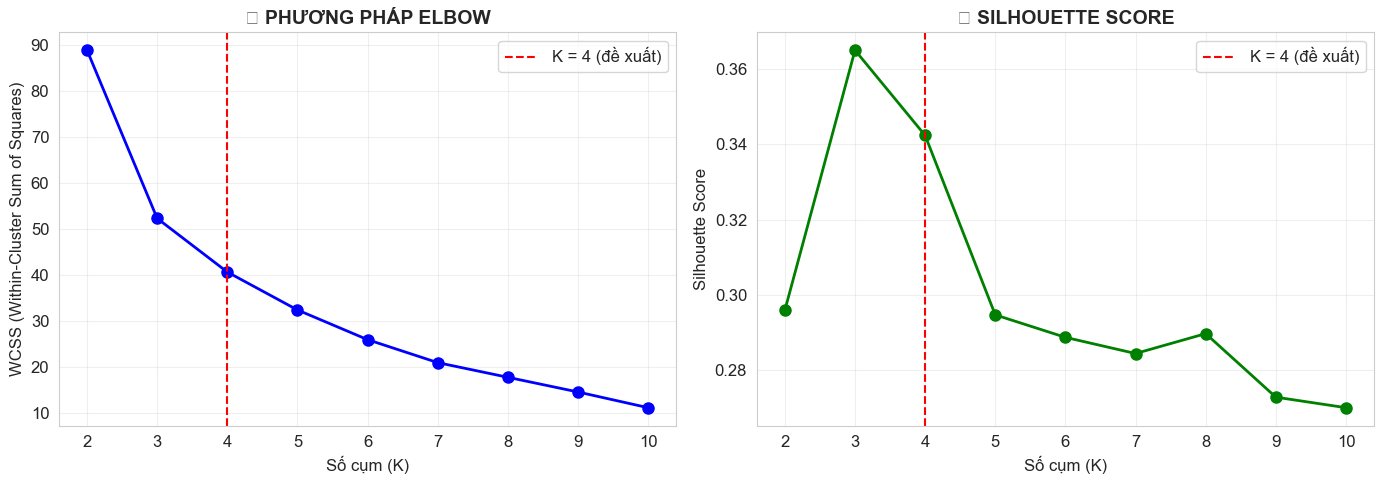


📌 KẾT LUẬN: Chọn K = 4 cụm (phù hợp với 4 nhóm rủi ro)


In [6]:
# ============================================================
# 📊 PHƯƠNG PHÁP ELBOW - TÌM SỐ CỤM TỐI ƯU
# ============================================================

# Tính WCSS cho các giá trị K từ 2 đến 10
K_range = range(2, 11)
wcss_values = []
silhouette_values = []

print("=" * 60)
print("🔍 ĐANG TÍNH TOÁN CÁC CHỈ SỐ ĐÁNH GIÁ...")
print("=" * 60)

for k in K_range:
    # Huấn luyện K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Tính WCSS (inertia)
    wcss_values.append(kmeans.inertia_)
    
    # Tính Silhouette Score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_values.append(sil_score)
    
    print(f"   K = {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette = {sil_score:.4f}")

print("\n✅ Hoàn thành!")

# Vẽ biểu đồ Elbow và Silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Elbow
axes[0].plot(K_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=4, color='red', linestyle='--', label='K = 4 (đề xuất)')
axes[0].set_xlabel('Số cụm (K)', fontsize=12)
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('📈 PHƯƠNG PHÁP ELBOW', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Biểu đồ Silhouette Score
axes[1].plot(K_range, silhouette_values, 'go-', linewidth=2, markersize=8)
axes[1].axvline(x=4, color='red', linestyle='--', label='K = 4 (đề xuất)')
axes[1].set_xlabel('Số cụm (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('📈 SILHOUETTE SCORE', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_silhouette.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("📌 KẾT LUẬN: Chọn K = 4 cụm (phù hợp với 4 nhóm rủi ro)")
print("=" * 60)

## 🤖 PHẦN 6: K-MEANS CLUSTERING

**Các bước:** Khởi tạo K tâm → Gán điểm vào cụm gần nhất → Cập nhật tâm → Lặp lại

| Ưu điểm | Nhược điểm |
|:--|:--|
| ✅ Đơn giản, nhanh | ❌ Phải chọn trước K |
| ✅ Luôn hội tụ | ❌ Nhạy với outliers |

In [7]:
# ============================================================
# 🤖 THUẬT TOÁN 1: K-MEANS CLUSTERING
# ============================================================

print("=" * 60)
print("🤖 HUẤN LUYỆN K-MEANS VỚI K = 4 CỤM")
print("=" * 60)

# Khởi tạo và huấn luyện K-Means
kmeans = KMeans(
    n_clusters=4,           # Số cụm = 4 (tương ứng 4 nhóm rủi ro)
    random_state=42,        # Seed để tái tạo kết quả
    n_init=10,              # Số lần khởi tạo
    max_iter=300            # Số vòng lặp tối đa
)

# Huấn luyện mô hình
kmeans.fit(X_scaled)

# Gán nhãn cụm cho mỗi quốc gia
country_stats['kmeans_cluster'] = kmeans.labels_

# Đánh giá chất lượng phân cụm
sil_score = silhouette_score(X_scaled, kmeans.labels_)
ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
db_score = davies_bouldin_score(X_scaled, kmeans.labels_)

print("\n📊 ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM K-MEANS:")
print("-" * 50)
print(f"   ✅ Silhouette Score: {sil_score:.4f}")
print(f"      (Gần 1 = tốt, gần 0 = chồng chéo, âm = sai)")
print(f"   ✅ Calinski-Harabasz Score: {ch_score:.2f}")
print(f"      (Càng cao càng tốt)")
print(f"   ✅ Davies-Bouldin Score: {db_score:.4f}")
print(f"      (Càng thấp càng tốt)")

print("\n📌 SỐ QUỐC GIA TRONG MỖI CỤM:")
print("-" * 50)
for cluster in range(4):
    count = (country_stats['kmeans_cluster'] == cluster).sum()
    print(f"   Cụm {cluster}: {count} quốc gia")

print("\n✅ K-Means clustering hoàn thành!")

🤖 HUẤN LUYỆN K-MEANS VỚI K = 4 CỤM

📊 ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM K-MEANS:
--------------------------------------------------
   ✅ Silhouette Score: 0.3423
      (Gần 1 = tốt, gần 0 = chồng chéo, âm = sai)
   ✅ Calinski-Harabasz Score: 13.04
      (Càng cao càng tốt)
   ✅ Davies-Bouldin Score: 0.9266
      (Càng thấp càng tốt)

📌 SỐ QUỐC GIA TRONG MỖI CỤM:
--------------------------------------------------
   Cụm 0: 8 quốc gia
   Cụm 1: 3 quốc gia
   Cụm 2: 5 quốc gia
   Cụm 3: 4 quốc gia

✅ K-Means clustering hoàn thành!


In [8]:
# ============================================================
# 📊 PHÂN TÍCH ĐẶC ĐIỂM CÁC CỤM K-MEANS
# ============================================================

print("=" * 60)
print("📊 ĐẶC ĐIỂM CÁC CỤM (K-MEANS)")
print("=" * 60)

# Tính trung bình các features cho mỗi cụm
cluster_analysis = country_stats.groupby('kmeans_cluster')[features_for_clustering].mean()

# Thêm số quốc gia trong mỗi cụm
cluster_counts = country_stats['kmeans_cluster'].value_counts().sort_index()
cluster_analysis['num_countries'] = cluster_counts.values

# Hiển thị kết quả
print("\n📋 THỐNG KÊ TRUNG BÌNH THEO CỤM:")
print(cluster_analysis.round(2))

# Phân loại nhóm rủi ro dựa trên đặc điểm
print("\n" + "=" * 60)
print("🎯 PHÂN LOẠI NHÓM RỦI RO (DỰA TRÊN ĐẶC ĐIỂM CỤM)")
print("=" * 60)

# Sắp xếp các cụm theo mức độ rủi ro (dựa trên tổng thiệt hại)
cluster_risk = cluster_analysis.sort_values('total_economic_loss', ascending=False)
risk_labels = ['🔴 RỦI RO CAO', '🟠 RỦI RO TRUNG BÌNH', '🟡 RỦI RO THẤP - THIỆT HẠI CAO', '🟢 RỦI RO THẤP']

for i, (cluster_id, row) in enumerate(cluster_risk.iterrows()):
    print(f"\n{risk_labels[i]} (Cụm {cluster_id}):")
    print(f"   • Số quốc gia: {int(row['num_countries'])}")
    print(f"   • TB số thảm họa: {row['disaster_count']:.1f}")
    print(f"   • TB mức độ nghiêm trọng: {row['avg_severity']:.2f}")
    print(f"   • TB tổng thiệt hại KT: ${row['total_economic_loss']:,.0f}")
    print(f"   • TB thời gian phản ứng: {row['avg_response_time']:.1f} giờ")
    print(f"   • TB hiệu quả ứng phó: {row['avg_efficiency']:.1f}%")

📊 ĐẶC ĐIỂM CÁC CỤM (K-MEANS)

📋 THỐNG KÊ TRUNG BÌNH THEO CỤM:
                disaster_count  avg_severity  total_casualties  \
kmeans_cluster                                                   
0                      2536.38          4.98         254210.38   
1                      2434.00          5.08         246747.67   
2                      2529.40          5.04         254881.20   
3                      2440.00          5.02         245306.25   

                total_economic_loss  avg_response_time  avg_efficiency  \
kmeans_cluster                                                           
0                      1.267335e+10              12.31           87.46   
1                      1.242105e+10              12.07           87.66   
2                      1.298537e+10              12.00           87.79   
3                      1.246322e+10              12.24           87.47   

                avg_recovery_days  num_countries  
kmeans_cluster                               

In [9]:
# ============================================================
# 📋 DANH SÁCH QUỐC GIA TRONG MỖI CỤM (K-MEANS)
# ============================================================

print("=" * 60)
print("📋 DANH SÁCH QUỐC GIA TRONG MỖI CỤM (K-MEANS)")
print("=" * 60)

for cluster in range(4):
    countries_in_cluster = country_stats[country_stats['kmeans_cluster'] == cluster]['country'].tolist()
    print(f"\n🔹 CỤM {cluster} ({len(countries_in_cluster)} quốc gia):")
    print(f"   {', '.join(countries_in_cluster)}")

📋 DANH SÁCH QUỐC GIA TRONG MỖI CỤM (K-MEANS)

🔹 CỤM 0 (8 quốc gia):
   Australia, Chile, China, Germany, India, Nigeria, Spain, Turkey

🔹 CỤM 1 (3 quốc gia):
   France, Indonesia, Mexico

🔹 CỤM 2 (5 quốc gia):
   Bangladesh, Brazil, Greece, Italy, South Africa

🔹 CỤM 3 (4 quốc gia):
   Canada, Japan, Philippines, United States


## 🌳 PHẦN 7: HIERARCHICAL CLUSTERING

**Agglomerative:** Mỗi điểm là 1 cụm → Gộp 2 cụm gần nhất → Lặp lại

**Linkage:** Single (min), Complete (max), Average (TB), Ward (variance)

| Ưu điểm | Nhược điểm |
|:--|:--|
| ✅ Không cần chọn K trước | ❌ Chậm O(n³) |
| ✅ Có Dendrogram | ❌ Nhạy với outliers |

🌳 VẼ DENDROGRAM (BIỂU ĐỒ CÂY PHÂN CẤP)


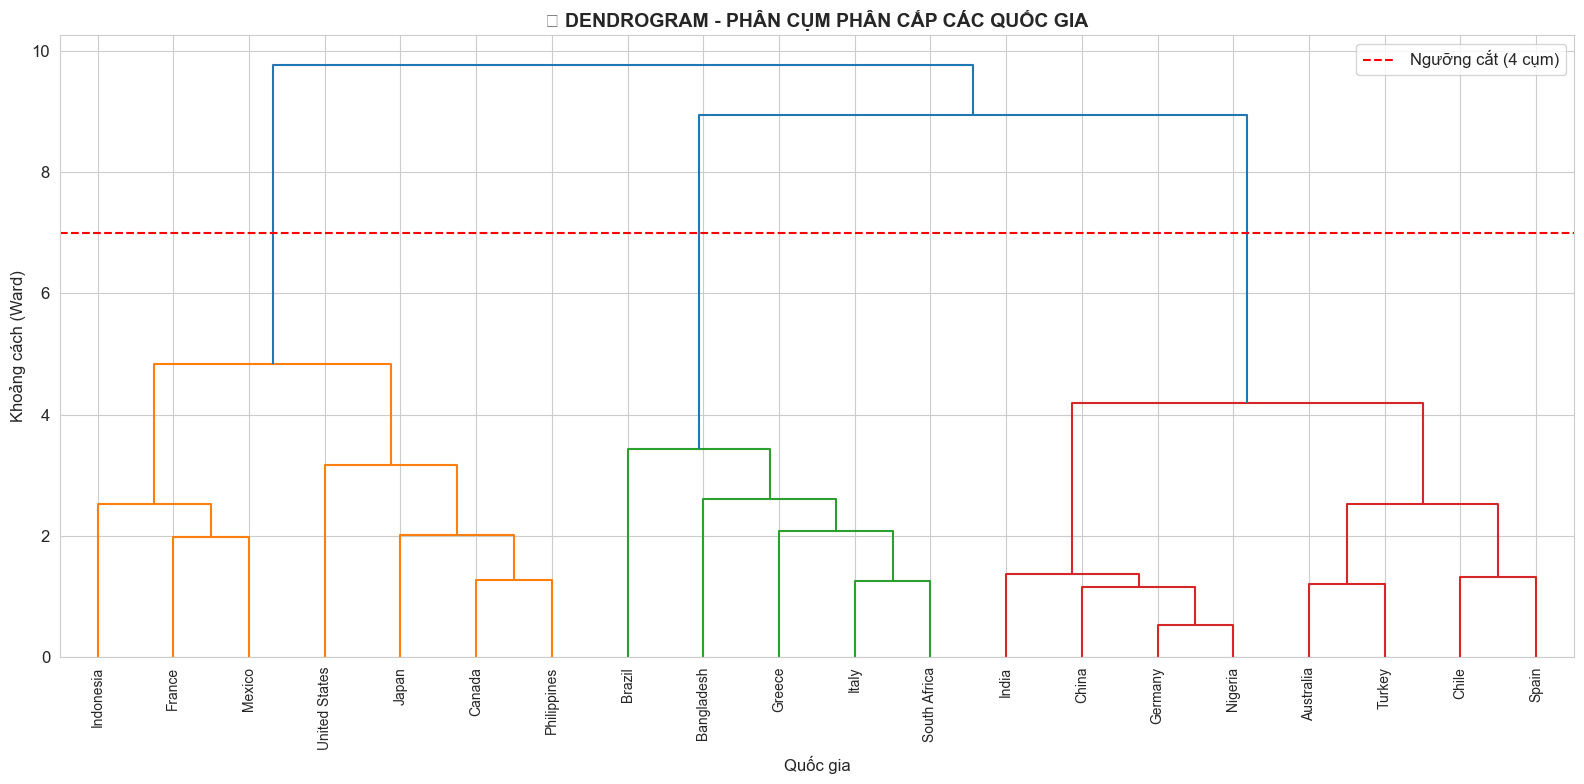


📌 Nhận xét: Đường ngang màu đỏ là ngưỡng cắt để tạo 4 cụm


In [10]:
# ============================================================
# 🌳 VẼ DENDROGRAM - BIỂU ĐỒ CÂY PHÂN CẤP
# ============================================================

print("=" * 60)
print("🌳 VẼ DENDROGRAM (BIỂU ĐỒ CÂY PHÂN CẤP)")
print("=" * 60)

# Tính linkage matrix
linked = linkage(X_scaled, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(16, 8))
dendrogram(
    linked,
    labels=country_stats['country'].values,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=7  # Ngưỡng màu để phân biệt 4 cụm
)

plt.title('🌳 DENDROGRAM - PHÂN CỤM PHÂN CẤP CÁC QUỐC GIA', fontsize=14, fontweight='bold')
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Khoảng cách (Ward)', fontsize=12)
plt.axhline(y=7, color='r', linestyle='--', label='Ngưỡng cắt (4 cụm)')
plt.legend()
plt.tight_layout()
plt.savefig('dendrogram.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📌 Nhận xét: Đường ngang màu đỏ là ngưỡng cắt để tạo 4 cụm")

In [11]:
# ============================================================
# 🌳 THUẬT TOÁN 2: HIERARCHICAL (AGGLOMERATIVE) CLUSTERING
# ============================================================

print("=" * 60)
print("🌳 HUẤN LUYỆN HIERARCHICAL CLUSTERING VỚI K = 4 CỤM")
print("=" * 60)

# Khởi tạo và huấn luyện Agglomerative Clustering
hierarchical = AgglomerativeClustering(
    n_clusters=4,           # Số cụm = 4
    linkage='ward'          # Phương pháp Ward (minimize variance)
)

# Huấn luyện và gán nhãn
country_stats['hierarchical_cluster'] = hierarchical.fit_predict(X_scaled)

# Đánh giá chất lượng phân cụm
sil_score_h = silhouette_score(X_scaled, hierarchical.labels_)
ch_score_h = calinski_harabasz_score(X_scaled, hierarchical.labels_)
db_score_h = davies_bouldin_score(X_scaled, hierarchical.labels_)

print("\n📊 ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM HIERARCHICAL:")
print("-" * 50)
print(f"   ✅ Silhouette Score: {sil_score_h:.4f}")
print(f"   ✅ Calinski-Harabasz Score: {ch_score_h:.2f}")
print(f"   ✅ Davies-Bouldin Score: {db_score_h:.4f}")

print("\n📌 SỐ QUỐC GIA TRONG MỖI CỤM (HIERARCHICAL):")
print("-" * 50)
for cluster in range(4):
    count = (country_stats['hierarchical_cluster'] == cluster).sum()
    print(f"   Cụm {cluster}: {count} quốc gia")

print("\n✅ Hierarchical clustering hoàn thành!")

🌳 HUẤN LUYỆN HIERARCHICAL CLUSTERING VỚI K = 4 CỤM

📊 ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM HIERARCHICAL:
--------------------------------------------------
   ✅ Silhouette Score: 0.3423
   ✅ Calinski-Harabasz Score: 13.04
   ✅ Davies-Bouldin Score: 0.9266

📌 SỐ QUỐC GIA TRONG MỖI CỤM (HIERARCHICAL):
--------------------------------------------------
   Cụm 0: 8 quốc gia
   Cụm 1: 4 quốc gia
   Cụm 2: 5 quốc gia
   Cụm 3: 3 quốc gia

✅ Hierarchical clustering hoàn thành!


## 🔵 PHẦN 8: DBSCAN

**Tham số:** eps (bán kính), min_samples (số điểm tối thiểu)

**Phân loại:** Core point, Border point, Noise point (outlier)

| Ưu điểm | Nhược điểm |
|:--|:--|
| ✅ Không cần K, phát hiện outliers | ❌ Khó chọn eps |
| ✅ Tìm cụm hình dạng bất kỳ | ❌ Không tốt với mật độ khác nhau |

In [12]:
# ============================================================
# 🔵 THUẬT TOÁN 3: DBSCAN CLUSTERING
# ============================================================

print("=" * 60)
print("🔵 HUẤN LUYỆN DBSCAN CLUSTERING")
print("=" * 60)

# Khởi tạo và huấn luyện DBSCAN
dbscan = DBSCAN(
    eps=1.5,                # Bán kính vùng lân cận
    min_samples=2           # Số điểm tối thiểu để tạo cụm
)

# Huấn luyện và gán nhãn
country_stats['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Đếm số cụm (không tính noise = -1)
n_clusters_dbscan = len(set(country_stats['dbscan_cluster'])) - (1 if -1 in country_stats['dbscan_cluster'].values else 0)
n_noise = (country_stats['dbscan_cluster'] == -1).sum()

print(f"\n📊 KẾT QUẢ DBSCAN:")
print("-" * 50)
print(f"   📌 Số cụm phát hiện: {n_clusters_dbscan}")
print(f"   📌 Số điểm noise (outliers): {n_noise}")

# Chỉ tính Silhouette nếu có ít nhất 2 cụm và không toàn noise
if n_clusters_dbscan >= 2:
    # Lọc bỏ noise points để tính silhouette
    mask = country_stats['dbscan_cluster'] != -1
    if mask.sum() > 1:
        sil_score_d = silhouette_score(X_scaled[mask], country_stats['dbscan_cluster'][mask])
        print(f"   ✅ Silhouette Score (không tính noise): {sil_score_d:.4f}")

print("\n📌 SỐ QUỐC GIA TRONG MỖI CỤM (DBSCAN):")
print("-" * 50)
for cluster in sorted(country_stats['dbscan_cluster'].unique()):
    count = (country_stats['dbscan_cluster'] == cluster).sum()
    label = "Noise (Outliers)" if cluster == -1 else f"Cụm {cluster}"
    print(f"   {label}: {count} quốc gia")

print("\n✅ DBSCAN clustering hoàn thành!")

🔵 HUẤN LUYỆN DBSCAN CLUSTERING

📊 KẾT QUẢ DBSCAN:
--------------------------------------------------
   📌 Số cụm phát hiện: 4
   📌 Số điểm noise (outliers): 8
   ✅ Silhouette Score (không tính noise): 0.4253

📌 SỐ QUỐC GIA TRONG MỖI CỤM (DBSCAN):
--------------------------------------------------
   Noise (Outliers): 8 quốc gia
   Cụm 0: 2 quốc gia
   Cụm 1: 2 quốc gia
   Cụm 2: 6 quốc gia
   Cụm 3: 2 quốc gia

✅ DBSCAN clustering hoàn thành!


## 📊 PHẦN 9: TRỰC QUAN HÓA KẾT QUẢ

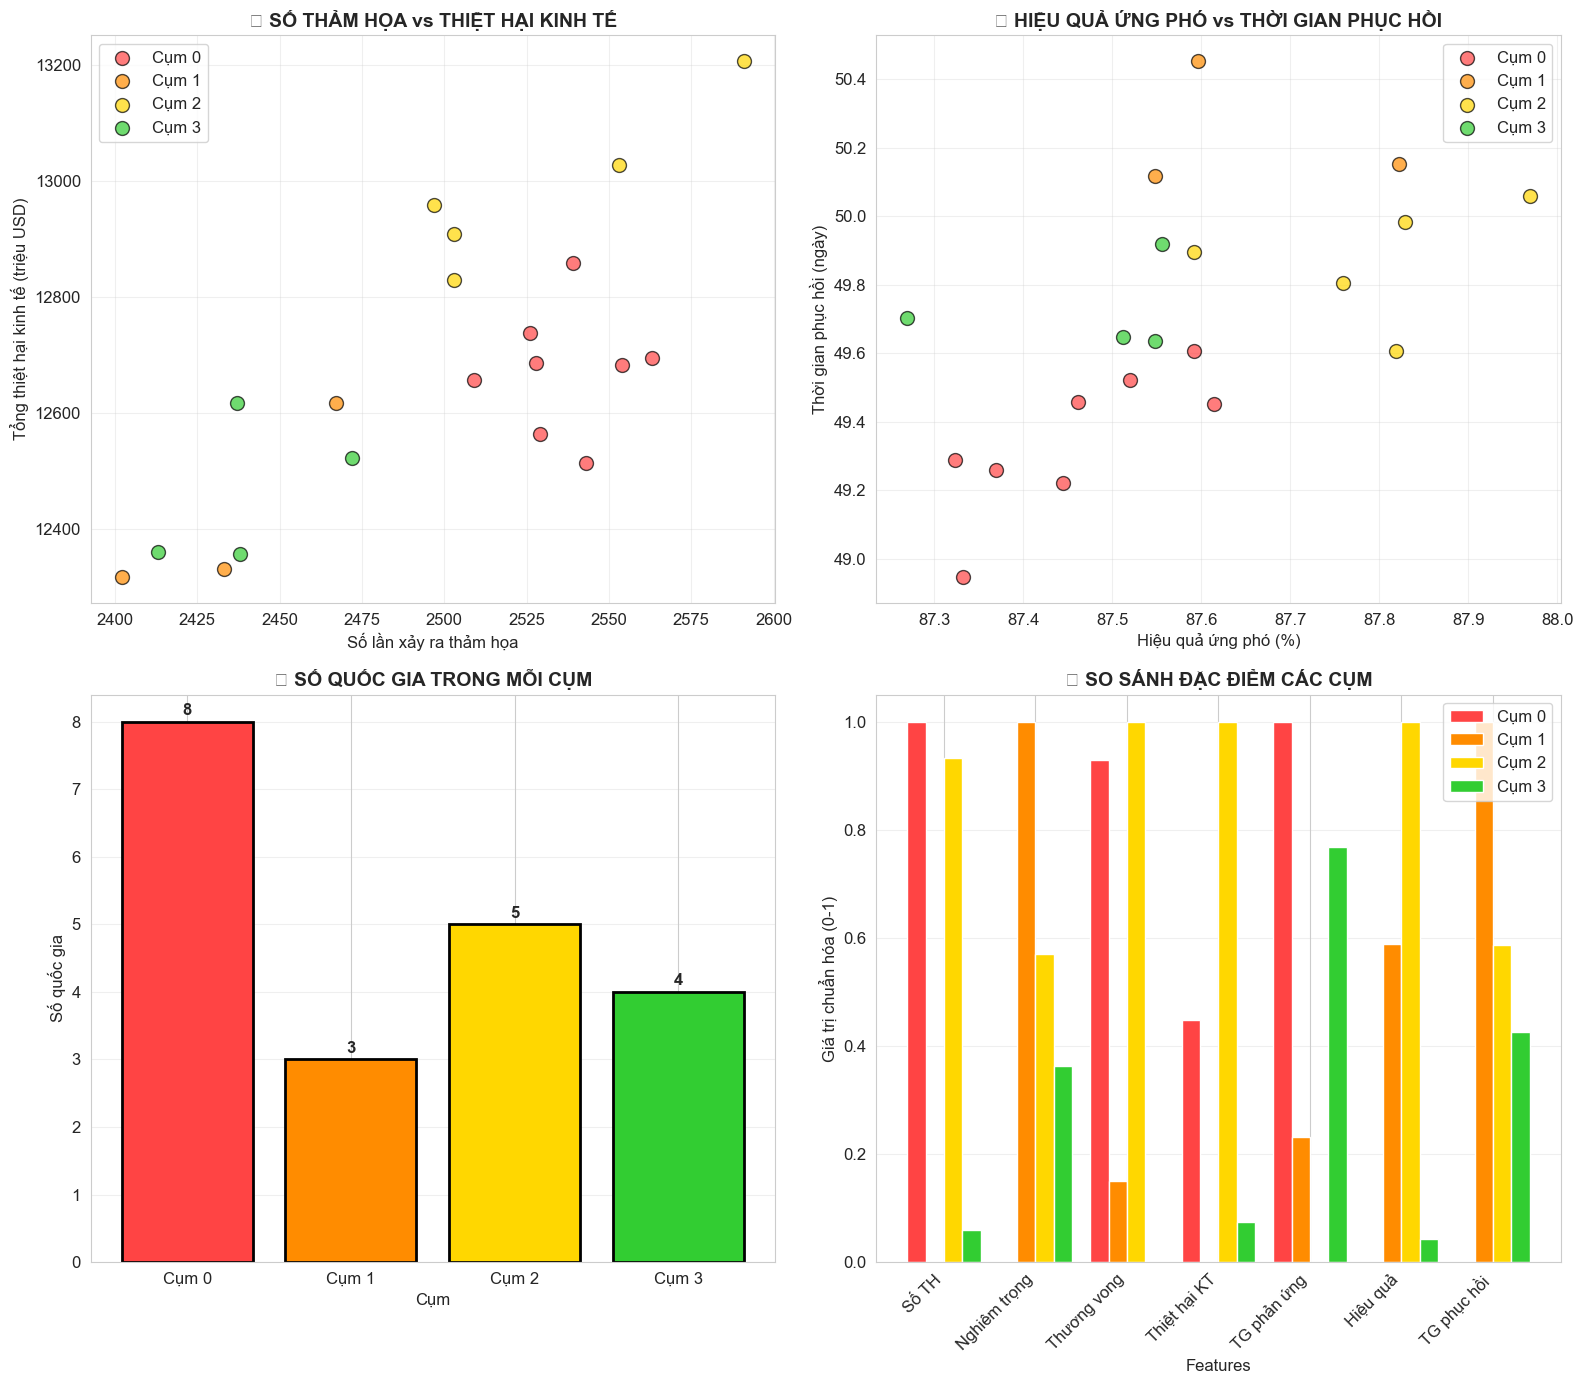


✅ Đã lưu biểu đồ vào file 'kmeans_visualization.png'


In [13]:
# ============================================================
# 📊 TRỰC QUAN HÓA KẾT QUẢ PHÂN CỤM K-MEANS
# ============================================================

# Màu sắc cho 4 nhóm rủi ro
colors = ['#FF4444', '#FF8C00', '#FFD700', '#32CD32']  # Đỏ, Cam, Vàng, Xanh
risk_names = ['Rủi ro Cao', 'Rủi ro TB', 'Rủi ro Thấp-TH Cao', 'Rủi ro Thấp']

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Scatter: Số thảm họa vs Tổng thiệt hại KT
ax1 = axes[0, 0]
for cluster in range(4):
    mask = country_stats['kmeans_cluster'] == cluster
    ax1.scatter(
        country_stats[mask]['disaster_count'],
        country_stats[mask]['total_economic_loss'] / 1e6,
        c=colors[cluster],
        label=f'Cụm {cluster}',
        s=100,
        alpha=0.7,
        edgecolors='black'
    )
ax1.set_xlabel('Số lần xảy ra thảm họa', fontsize=12)
ax1.set_ylabel('Tổng thiệt hại kinh tế (triệu USD)', fontsize=12)
ax1.set_title('📈 SỐ THẢM HỌA vs THIỆT HẠI KINH TẾ', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter: Hiệu quả ứng phó vs Thời gian phục hồi
ax2 = axes[0, 1]
for cluster in range(4):
    mask = country_stats['kmeans_cluster'] == cluster
    ax2.scatter(
        country_stats[mask]['avg_efficiency'],
        country_stats[mask]['avg_recovery_days'],
        c=colors[cluster],
        label=f'Cụm {cluster}',
        s=100,
        alpha=0.7,
        edgecolors='black'
    )
ax2.set_xlabel('Hiệu quả ứng phó (%)', fontsize=12)
ax2.set_ylabel('Thời gian phục hồi (ngày)', fontsize=12)
ax2.set_title('📈 HIỆU QUẢ ỨNG PHÓ vs THỜI GIAN PHỤC HỒI', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Bar chart: Số quốc gia trong mỗi cụm
ax3 = axes[1, 0]
cluster_counts = country_stats['kmeans_cluster'].value_counts().sort_index()
bars = ax3.bar(range(4), cluster_counts.values, color=colors, edgecolor='black', linewidth=2)
ax3.set_xlabel('Cụm', fontsize=12)
ax3.set_ylabel('Số quốc gia', fontsize=12)
ax3.set_title('📊 SỐ QUỐC GIA TRONG MỖI CỤM', fontsize=14, fontweight='bold')
ax3.set_xticks(range(4))
ax3.set_xticklabels([f'Cụm {i}' for i in range(4)])
for bar, count in zip(bars, cluster_counts.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Radar chart đặc điểm các cụm
ax4 = axes[1, 1]
cluster_means = country_stats.groupby('kmeans_cluster')[features_for_clustering].mean()
# Chuẩn hóa về 0-1 để vẽ radar
cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Vẽ bar chart thay cho radar (đơn giản hơn)
x = np.arange(len(features_for_clustering))
width = 0.2
for i in range(4):
    ax4.bar(x + i*width, cluster_means_norm.iloc[i], width, label=f'Cụm {i}', color=colors[i])
ax4.set_xlabel('Features', fontsize=12)
ax4.set_ylabel('Giá trị chuẩn hóa (0-1)', fontsize=12)
ax4.set_title('📊 SO SÁNH ĐẶC ĐIỂM CÁC CỤM', fontsize=14, fontweight='bold')
ax4.set_xticks(x + width * 1.5)
ax4.set_xticklabels(['Số TH', 'Nghiêm trọng', 'Thương vong', 'Thiệt hại KT', 
                     'TG phản ứng', 'Hiệu quả', 'TG phục hồi'], rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('kmeans_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ vào file 'kmeans_visualization.png'")

## 📈 PHẦN 10: SO SÁNH CÁC THUẬT TOÁN

In [14]:
# ============================================================
# 📈 SO SÁNH CÁC THUẬT TOÁN CLUSTERING
# ============================================================

print("=" * 70)
print("📈 BẢNG SO SÁNH CÁC THUẬT TOÁN CLUSTERING")
print("=" * 70)

# Tính các chỉ số cho từng thuật toán
results = {
    'Thuật toán': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Số cụm': [4, 4, n_clusters_dbscan],
    'Silhouette Score': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# K-Means scores
results['Silhouette Score'].append(silhouette_score(X_scaled, kmeans.labels_))
results['Calinski-Harabasz'].append(calinski_harabasz_score(X_scaled, kmeans.labels_))
results['Davies-Bouldin'].append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Hierarchical scores
results['Silhouette Score'].append(silhouette_score(X_scaled, hierarchical.labels_))
results['Calinski-Harabasz'].append(calinski_harabasz_score(X_scaled, hierarchical.labels_))
results['Davies-Bouldin'].append(davies_bouldin_score(X_scaled, hierarchical.labels_))

# DBSCAN scores (nếu có đủ cụm)
if n_clusters_dbscan >= 2:
    mask = country_stats['dbscan_cluster'] != -1
    if mask.sum() > 1:
        results['Silhouette Score'].append(silhouette_score(X_scaled[mask], country_stats['dbscan_cluster'][mask]))
        results['Calinski-Harabasz'].append(calinski_harabasz_score(X_scaled[mask], country_stats['dbscan_cluster'][mask]))
        results['Davies-Bouldin'].append(davies_bouldin_score(X_scaled[mask], country_stats['dbscan_cluster'][mask]))
    else:
        results['Silhouette Score'].append(np.nan)
        results['Calinski-Harabasz'].append(np.nan)
        results['Davies-Bouldin'].append(np.nan)
else:
    results['Silhouette Score'].append(np.nan)
    results['Calinski-Harabasz'].append(np.nan)
    results['Davies-Bouldin'].append(np.nan)

# Tạo DataFrame kết quả
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.round(4)

print("\n📊 BẢNG SO SÁNH:")
print(comparison_df.to_string(index=False))

print("\n" + "=" * 70)
print("📌 GIẢI THÍCH CÁC CHỈ SỐ:")
print("=" * 70)
print("""
   • Silhouette Score: Đo độ tách biệt giữa các cụm
     - Giá trị từ -1 đến 1
     - Gần 1 = cụm tách biệt tốt
     - Gần 0 = cụm chồng chéo
     - Âm = có thể gán sai cụm

   • Calinski-Harabasz Score: Tỷ lệ phân tán giữa/trong cụm
     - Càng CAO càng TỐT
     - Đo mức độ đặc (dense) và tách biệt của cụm

   • Davies-Bouldin Score: Độ tương tự trung bình giữa các cụm
     - Càng THẤP càng TỐT
     - Đo khoảng cách giữa các tâm cụm
""")

📈 BẢNG SO SÁNH CÁC THUẬT TOÁN CLUSTERING

📊 BẢNG SO SÁNH:
  Thuật toán  Số cụm  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
     K-Means       4            0.3423            13.0431          0.9266
Hierarchical       4            0.3423            13.0431          0.9266
      DBSCAN       4            0.4253            12.7670          0.6730

📌 GIẢI THÍCH CÁC CHỈ SỐ:

   • Silhouette Score: Đo độ tách biệt giữa các cụm
     - Giá trị từ -1 đến 1
     - Gần 1 = cụm tách biệt tốt
     - Gần 0 = cụm chồng chéo
     - Âm = có thể gán sai cụm

   • Calinski-Harabasz Score: Tỷ lệ phân tán giữa/trong cụm
     - Càng CAO càng TỐT
     - Đo mức độ đặc (dense) và tách biệt của cụm

   • Davies-Bouldin Score: Độ tương tự trung bình giữa các cụm
     - Càng THẤP càng TỐT
     - Đo khoảng cách giữa các tâm cụm

